In [1]:
import pandas as pd
import numpy as np
import string

from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#For ignoring warning
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split

x = data['text']
y = data['classes']

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=True)

In [4]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [5]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [6]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [7]:
x = x.apply(preprocess)
x = np.array([vectorize(sentence) for sentence in x])

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
# predict the labels on validation dataset
y_predict = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(y_predict, y_test)*100)

Accuracy Score ->  93.3046875


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6528
           1       0.93      0.94      0.93      6272

    accuracy                           0.93     12800
   macro avg       0.93      0.93      0.93     12800
weighted avg       0.93      0.93      0.93     12800



In [23]:
from sklearn.model_selection import KFold

# Define k fold cross validation (k = 10)
kFold=KFold(n_splits=10,random_state=42,shuffle=True)

scores=[]
clg = LogisticRegression()
for train_index,test_index in kFold.split(x):
    
    # select the chosen instances in X and y
    X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    # fit the knn model with selected data
    clg.fit(X_train, y_train)
    # add the score to the list of scores for each fold
    scores.append(clg.score(X_test, y_test))

# fit the knn model with ordinary choice of train and test set
clg.fit(X_train,y_train)
scores.append(clg.score(X_test,y_test))
print(scores)

[0.9334375, 0.94015625, 0.93734375, 0.94109375, 0.9371875, 0.93765625, 0.9359375, 0.93640625, 0.9353125, 0.9321875, 0.9321875]


In [24]:
print(sum(scores) / len(scores))

0.9362642045454543


## SVM

In [8]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

In [9]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)

In [13]:
print("Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

Accuracy Score ->  93.359375


In [18]:
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6528
           1       0.93      0.94      0.93      6272

    accuracy                           0.93     12800
   macro avg       0.93      0.93      0.93     12800
weighted avg       0.93      0.93      0.93     12800



In [25]:
# Define k fold cross validation (k = 10)
kFold=KFold(n_splits=10,random_state=42,shuffle=True)

scores=[]
for train_index,test_index in kFold.split(x):
    
    # select the chosen instances in X and y
    X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    # fit the knn model with selected data
    SVM.fit(X_train, y_train)
    # add the score to the list of scores for each fold
    scores.append(SVM.score(X_test, y_test))

# fit the knn model with ordinary choice of train and test set
SVM.fit(X_train,y_train)
scores.append(SVM.score(X_test,y_test))
print(scores)

[0.93359375, 0.94125, 0.9375, 0.9428125, 0.93890625, 0.938125, 0.935625, 0.93546875, 0.934375, 0.933125, 0.933125]


In [26]:
print(sum(scores) / len(scores))

0.93671875


## K-nearest

[0.806875, 0.8090625, 0.831015625, 0.8384375, 0.842890625, 0.847109375, 0.8471875, 0.85109375, 0.849765625, 0.8528125, 0.851015625, 0.85171875, 0.84828125, 0.8521875, 0.851875, 0.85390625, 0.8540625, 0.856875, 0.8546875, 0.855703125, 0.852578125, 0.8540625, 0.852578125, 0.854765625, 0.852890625, 0.855390625, 0.853125, 0.854921875, 0.85359375, 0.855546875, 0.8546875, 0.856953125, 0.85578125, 0.856796875, 0.85515625, 0.85640625, 0.8553125, 0.85703125, 0.8540625, 0.857265625, 0.854921875, 0.856328125, 0.853828125, 0.8559375, 0.855, 0.854375, 0.85390625, 0.85484375, 0.853125, 0.854375]


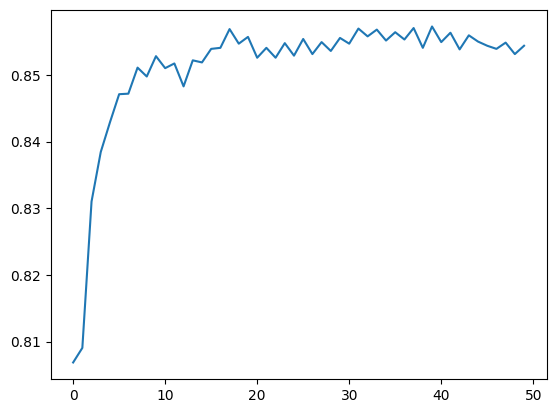

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

accuracy_list = []

for i in range(50):
    knn = KNeighborsClassifier(n_neighbors = (i + 1))
    knn.fit(X_train, y_train)

    accuracy_list.append(knn.score(X_test, y_test))

print(accuracy_list)

plt.plot(accuracy_list)

In [27]:
# Define k fold cross validation (k = 10)
kFold=KFold(n_splits=10,random_state=42,shuffle=True)

scores=[]
knn_2 = KNeighborsClassifier(n_neighbors = 12)
for train_index,test_index in kFold.split(x):
    
    # select the chosen instances in X and y
    X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    # fit the knn model with selected data
    knn_2.fit(X_train, y_train)
    # add the score to the list of scores for each fold
    scores.append(knn_2.score(X_test, y_test))

# fit the knn model with ordinary choice of train and test set
knn_2.fit(X_train,y_train)
scores.append(knn_2.score(X_test,y_test))
print(scores)

[0.86109375, 0.86046875, 0.85640625, 0.85453125, 0.8596875, 0.85578125, 0.8496875, 0.856875, 0.85703125, 0.8603125, 0.8603125]


In [28]:
print(sum(scores) / len(scores))

0.8574715909090908
